# Offline plotting - averaging

This notebook explains how to use row- and column-wise averaging together with the `plot_by_id` function.

The QCoDeS plotting module offers two small helper functions to average over one dimension of a heatmap.

In [1]:
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import (plot_by_id,
                                     average_columnwise,
                                     average_rowwise)
from qcodes import Parameter
import numpy as np

In [2]:
from qcodes.dataset.database import get_DB_location, initialise_or_create_database_at
initialise_or_create_database_at(get_DB_location())

## Example: A heatmap on a grid

In [3]:
x_param = Parameter(name='x', label='Voltage', unit='V')
y_param = Parameter(name='y', label='Temperature', unit='K')
z_param = Parameter(name='z', label='Current', unit='A')

meas = Measurement()
meas.register_parameter(x_param)
meas.register_parameter(y_param)
meas.register_parameter(z_param, setpoints=(x_param, y_param))

with meas.run() as datasaver:
    for x_val in np.linspace(0, np.pi, 50):
        for y_val in np.linspace(-1, 1, 40):
            datasaver.add_result((x_param, x_val),
                                 (y_param, y_val),
                                 (z_param, np.cos(x_val) + y_val))
dataid = datasaver.run_id

Starting experimental run with id: 56


Now, we can visualise this run using `plot_by_id`.

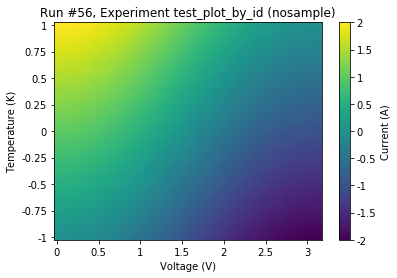

In [4]:
ax, cb = plot_by_id(dataid)

To average along each row or column, respectively, we simply call the appropriate function on the output of `plot_by_id`. Note that this function produces the same output.

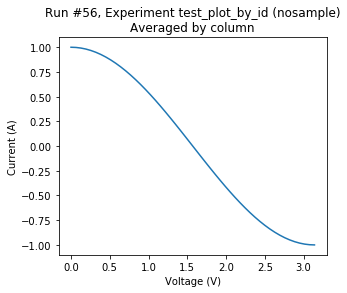

In [5]:
ax, cb = average_columnwise(plot_by_id(dataid))

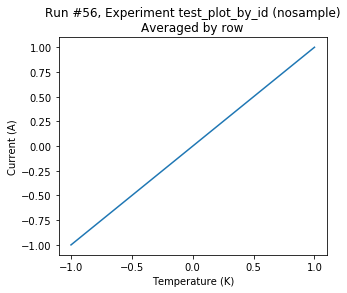

In [6]:
ax, cb = average_rowwise(plot_by_id(dataid))

## Input left unchanged

Since the function produces the same output as `plot_by_id`, it can be applied many times. Since a line plot cannot meaningfully be averaged along rows or columns, the line plots are left unchanged.

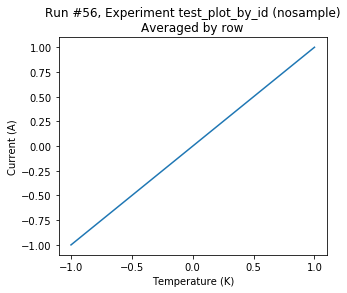

In [7]:
ax, cb = average_columnwise(average_rowwise(plot_by_id(dataid)))

The same thing happens if we apply the averaging to other plots that can not be averaged, e.g. a 2D heatmap scatter plot.

In [8]:
x_param = Parameter(name='x', label='Voltage', unit='V')
y_param = Parameter(name='y', label='Temperature', unit='K')
z_param = Parameter(name='z', label='Current', unit='A')

meas = Measurement()
meas.register_parameter(x_param)
meas.register_parameter(y_param)
meas.register_parameter(z_param, setpoints=(x_param, y_param))

with meas.run() as datasaver:
    for x_val in np.linspace(0, np.pi, 50):
        for y_val in np.random.rand(40) - 0.5:
            datasaver.add_result((x_param, x_val),
                                 (y_param, y_val),
                                 (z_param, np.cos(x_val) + y_val))
dataid = datasaver.run_id

Starting experimental run with id: 57


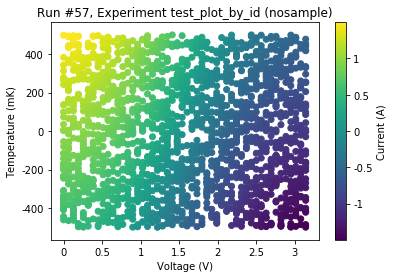

In [9]:
ax, cb = plot_by_id(dataid)

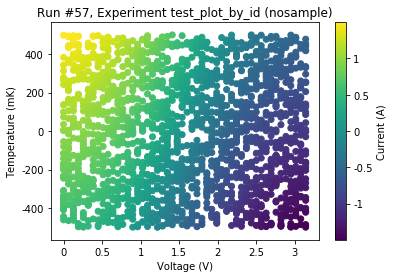

In [10]:
ax, cb = average_columnwise(plot_by_id(dataid))